In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

In [4]:
import anndata as ad
def load_data(input_dir, samples):
    adata_list = []
    for sample in samples:
        adata_temp = sc.read_h5ad(input_dir + sample + '.h5ad')
        adata_temp = adata_temp[adata_temp.obs['ClusterName']!='NA']
        adata_temp.var_names_make_unique()
        adata_temp.obs_names_make_unique()
        adata_temp.obsm['spatial'] = adata_temp.obs[['x', 'y']].values
        if sample == 'BZ5':
            adata_temp.obs['z'] = adata_temp.obs['z'] + 1
            adata_temp.obs['z'] = adata_temp.obs['z'].astype('str')
        print(adata_temp.shape)
        adata_list.append(adata_temp)
    adata_pre = ad.concat(adata_list, index_unique="-", keys = samples)
    return adata_pre

samples = ['BZ5', 'BZ9', 'BZ14']
input_dir = 'G:/dataset/08-STARmap/input/'
annotation = 'z'   #  ClusterName  15        z  4
print("samples: ", samples)
adata_pre = load_data(input_dir, samples)
adata_pre.obs[annotation] = adata_pre.obs[annotation].astype("category")
adata_pre.obs['batch'] = adata_pre.obs['batch'].astype('category')
# adata_pre.obsm['spatial'] = adata_pre.obs[['x', 'y']].values
adata_pre.obsm['spatial'] = adata_pre.obsm['spatial'].astype(float)
adata_pre

samples:  ['BZ5', 'BZ9', 'BZ14']
(1049, 166)
(1053, 166)
(1088, 166)


AnnData object with n_obs × n_vars = 3190 × 166
    obs: 'orig.ident', 'nCount_STARmap', 'nFeature_STARmap', 'CellID', 'ClusterID', 'ClusterName', 'x', 'y', 'c', 'z', 'batch'
    obsm: 'spatial'

In [24]:
index_list = df.index.tolist()
res = []
for index,row in adata_pre.obs.iterrows():
    temp_str = str(round(row['x'])) + 'x' + str(round(row['y']))
    print(temp_str)
    if temp_str in index_list:
        res.append(index)

len(res)

69x4486
93x1063
143x3445
88x4092
120x4293
104x2648
105x2425
146x5387
107x3104
127x3822
259x4507
210x2935
241x3271
239x2631
281x3080
224x3566
221x4872
290x5270
276x5435
321x3949
339x2790
317x5119
342x5600
352x2563
372x1693
311x2357
385x5503
396x4972
388x5349
402x1331
409x4543
413x5757
393x4808
446x5944
462x5091
482x5413
482x5581
461x3050
471x5246
526x5768
555x1786
563x5971
526x6243
548x6495
554x6386
558x5137
561x6118
581x4471
599x5622
604x5412
598x6567
578x286
616x5239
652x6228
705x1715
732x5330
835x5264
871x1075
847x241
887x5359
949x787
906x2244
898x92
1023x284
1022x5565
1107x4892
1155x352
1219x6017
1225x5122
1249x136
1251x4565
1338x2782
1373x6021
1382x2384
1474x1644
1500x293
1580x763
1588x535
1627x5761
1707x565
1677x5560
1779x5697
1773x4571
1790x4707
1830x5552
1794x5436
1911x4654
1932x5445
1978x5613
1980x6074
2003x3832
2040x5814
2050x4659
2066x2105
2085x390
2097x4378
2152x5956
2160x4870
2221x5691
2217x6516
2248x5871
2239x1154
2297x3080
2302x3966
2343x1019
2374x198
2362x3504
2390x3361


3022

In [6]:
output_dir = 'G:/dataset/08-STARmap/output/PRECAST/PRECAST.csv'
df = pd.read_csv(output_dir, index_col = 0)
df

,PRECAST_1,PRECAST_2,PRECAST_3,PRECAST_4,PRECAST_5,PRECAST_6,PRECAST_7,PRECAST_8,PRECAST_9,PRECAST_10,PRECAST_11,PRECAST_12,PRECAST_13,PRECAST_14,PRECAST_15
69x4486,0.110445,-1.241139,0.157272,-2.094115,-0.185443,0.560885,0.473612,-0.277962,1.193927,-0.188240,-0.291501,0.366171,-0.582914,0.510197,1.037292
93x1063,-0.447268,-1.491789,-0.064274,-0.040413,-1.596078,-0.090327,-0.525883,-1.187303,1.613588,1.225723,-0.318028,1.061709,-2.037261,0.124655,1.720142
143x3445,-0.365886,-2.143859,0.353897,-0.168468,-1.538890,-0.036838,0.508527,-0.969843,0.297208,-0.614202,1.421644,-0.075288,0.568047,0.752757,1.068164
88x4092,-0.418962,-1.678085,0.198793,0.161783,-1.568271,0.201130,1.202306,-1.053952,1.597344,-0.104662,-0.700967,0.768861,-0.423959,0.651830,0.804827
120x4293,-0.218489,-1.576721,-0.134077,0.090115,-1.504456,0.148445,0.462122,-1.146456,1.471266,0.507323,0.869101,0.675978,-1.577278,0.639154,0.974297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12139x4587,-0.198430,-1.315617,0.053909,0.066443,-1.524159,0.071192,0.359659,-1.224271,-0.171695,-0.896173,-0.559044,0.082156,-1.043365,0.929292,1.093559
12214x5199,2.905481,-1.213326,0.362745,-9.983461,4.904754,2.324450,1.054213,0.961915,1.078422,1.340861,-0.767532,-0.706197,0.848029,0.319121,-1.060596
12285x3492,0.095037,-1.632064,0.220302,0.062915,-1.592456,0.172888,1.196452,-1.161476,0.269852,0.033080,0.944350,0.044061,-0.084145,0.400062,0.403316
12274x5332,2.675275,-0.757888,0.726424,-9.833587,4.956866,2.429750,0.911969,1.078902,1.563326,1.559715,0.336781,-0.653635,0.407692,0.000868,-0.560884


In [19]:
sample = 'BZ5'
adata = sc.read_h5ad(input_dir+sample+'/'+sample+'.h5ad')
adata = adata[adata.obs['ClusterName']!='NA']
adata.obs['z'] = adata.obs['z'] + 1
adata.obs['z'] = adata.obs['z'].astype('str')
print(adata.obs['z'].unique())

[1 2 3 4]


C:\Users\23147\AppData\Local\Temp\ipykernel_18272\36760288.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['z'] = adata.obs['z'] + 1


In [20]:
adata.obs['z']

1       1
3       1
5       1
6       1
7       1
       ..
1123    4
1124    4
1125    4
1126    4
1127    4
Name: z, Length: 1049, dtype: int32

[0 1 2 3]
['Smc' 'Endo' 'Astro' 'eL6-2' 'Oligo' 'eL5-3' 'Reln' 'VIP' 'eL2/3' 'NPY'
 'eL5-2' 'Lhx6' 'L5-1' 'SST' 'eL6-1']


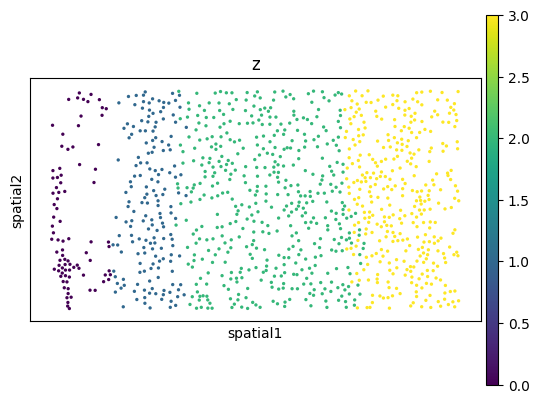

['1' '2' '3' '4']
['VIP' 'Smc' 'Astro' 'Endo' 'Reln' 'NPY' 'eL5-3' 'Oligo' 'Lhx6' 'eL6-2'
 'eL5-2' 'eL2/3' 'L5-1' 'SST' 'eL6-1']


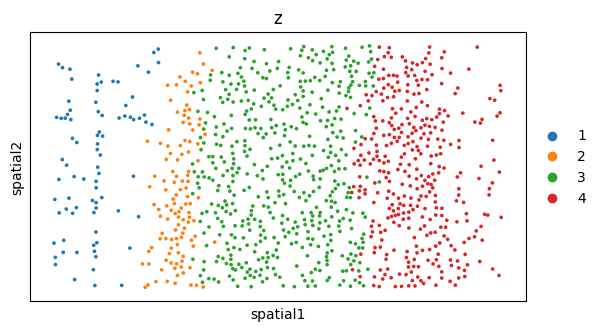

['1' '2' '3' '4']
['Astro' 'eL5-3' 'VIP' 'Endo' 'L5-1' 'eL6-2' 'eL2/3' 'Smc' 'Reln' 'NPY'
 'Oligo' 'eL5-2' 'SST' 'eL6-1' 'Lhx6']


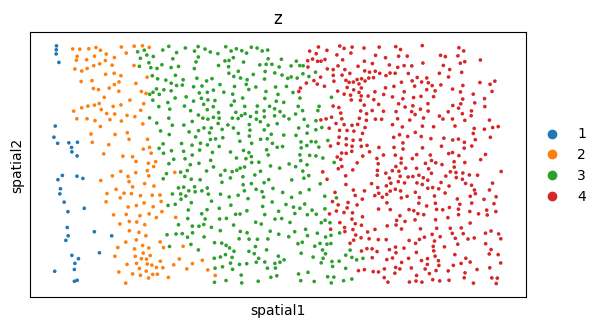

In [12]:
samples = ['BZ5', 'BZ9', 'BZ14']
input_dir = 'G:/dataset/08-STARmap/input/'
for sample in samples:
    adata = sc.read_h5ad(input_dir+sample+'/'+sample+'.h5ad')
    adata = adata[adata.obs['ClusterName']!='NA']
    adata.obsm['spatial'] = adata.obs[['x', 'y']].values
    # adata
    print(adata.obs['z'].unique())
    print(adata.obs['ClusterName'].unique())
    sc.pl.spatial(adata, color='z', spot_size = 100)

In [3]:
adata.obs = adata.obs.astype('str')
adata.obs

,orig.ident,nCount_STARmap,nFeature_STARmap,CellID,ClusterID,ClusterName,x,y,c,z,batch
4,0,179.0,31,3,11,Astro,47.487014019137234,2552.7124646342627,Astro,1,BZ14
9,0,159.0,28,8,3,eL5-3,69.10855539971949,6220.878701662993,eL5-3,1,BZ14
10,0,126.0,15,9,6,VIP,83.63843926343927,2247.7920997920996,VIP,1,BZ14
13,0,226.0,24,12,13,Endo,117.19251522392662,53.84949510521853,Endo,1,BZ14
14,0,142.0,26,13,11,Astro,157.0731688209949,3715.0929494712104,Astro,1,BZ14
...,...,...,...,...,...,...,...,...,...,...,...
1204,0,147.0,29,1203,11,Astro,12138.610163190959,4586.796847700829,Astro,4,BZ14
1206,0,361.0,35,1205,10,NPY,12214.484557536773,5199.407179681219,NPY,4,BZ14
1211,0,113.0,25,1210,12,Oligo,12284.53162330524,3491.9559179186517,Oligo,4,BZ14
1212,0,251.0,36,1211,10,NPY,12273.803085774058,5332.398012552301,NPY,4,BZ14


In [4]:
adata.obs['z'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [13]:
# adata = adata[]
print(adata.obs[['x','ClusterName']])
pd.isna(adata.obs['x'])
adata.shape[1]

                 x ClusterName
4        47.487014       Astro
9        69.108555       eL5-3
10       83.638439         VIP
13      117.192515        Endo
14      157.073169       Astro
...            ...         ...
1204  12138.610163       Astro
1206  12214.484558         NPY
1211  12284.531623       Oligo
1212  12273.803086         NPY
1213  12271.376826       eL6-2

[1088 rows x 2 columns]


166